# Exercise 1
__Gradient Derivation__

For $d=1, n=1$: 

\begin{equation}
\nabla F(\beta) = \frac{1}{1+e^{-yx\beta}}(e^{-yx\beta})(-yx) + 2\lambda\beta
\end{equation}

\begin{equation}
\nabla F(\beta) = \frac{-yxe^{-yx\beta}}{1+e^{-yx\beta}} + 2\lambda\beta
\end{equation}

When $d\geq1, n\geq1$, we generalize (by linearity): 

For the $j=1,...,d$ features,


\begin{equation}
\frac{\partial F}{\partial \beta_j} = \frac{1}{n} \sum_{i=1}^{n}{\frac{-y_ix_{ij}\:exp\:(-y_ix_i^T\beta)}{1+exp\:(-y_ix_i^T\beta)}} + 2\lambda\beta_j
\end{equation}

Then,

\begin{equation}
\nabla F(\beta) = \frac{-1}{n} \sum_{i=1}^{n}{\frac{y_ix_i\:exp\:(-y_ix_i^T\beta)}{1+exp\:(-y_ix_i^T\beta)}} + 2\lambda\beta
\end{equation}

__Retrieving Spam Dataset__ *(see code in homework3.py)*

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegressionCV

""" Exercise 1 """

# load data
spam = pd.read_csv('../resources/spam.data', sep=' ', header=None)

# change output labels to -1/+1
y = spam.iloc[:,-1].apply(lambda x: -1 if x==0 else 1)

# standardize features (by default, done independently)
spam_arr = np.array(spam.iloc[:,:-1])
scaler = StandardScaler()
X = scaler.fit_transform(spam_arr)

__Function Definitions__ *(see code in homework3.py)*

In [2]:
def obj(B, lmbda, X=X, y=y):
    risk = (1/len(y)) * np.log(1 + np.exp(-np.dot(y,np.dot(X,B))))
    penalty = lmbda * np.linalg.norm(B)**2
    return risk + penalty 

In [3]:
def computegrad(B, lmbda=0, X=X, y=y):
    exp_term = np.exp(-np.dot(y, np.dot(X,B))) 
    print(exp_term)
    risk = (-1/len(y)) * np.dot(np.dot(y,X), exp_term) / (1 + exp_term)
    penalty = 2 * lmbda * B
    return risk + penalty

In [4]:
def backtracking(B, eta, alpha=0.5, gamma=0.8, lmbda=0, X=X, y=y):
    grad_B = computegrad(B, X=X, y=y)
    norm_grad_B = np.linalg.norm(grad_B)    
    
    while not obj(B-eta*grad_B, lmbda, X=X, y=y) <= obj(B,lmbda, X=X, y=y) - alpha*eta*norm_grad_B**2:
        eta *= gamma
          
    return eta

In [5]:
def graddescent(B_init, eta_init, epsilon, lmbda=0, max_iter=1000, X=X, y=y):   
    eta = eta_init 
    B = B_init 
    grad_B = computegrad(B, lmbda=lmbda, X=X, y=y)
    B_vals = [B]
    iter_num = 0 
    
    while np.linalg.norm(grad_B) > epsilon:
        eta = backtracking(B, eta, lmbda=lmbda, X=X, y=y)
        B = B - eta*grad_B
        B_vals.append(B)    
        grad_B = computegrad(B, lmbda=lmbda, X=X, y=y)
        iter_num += 1
    
    return np.array(B_vals) 

In [18]:
def fastgradalgo(eta_init, epsilon, lmbda=0, max_iter=1000, X=X, y=y):
    theta = np.zeros(X.shape[1])
    B = np.zeros(X.shape[1])
    grad_B = computegrad(B, lmbda=lmbda, X=X, y=y)
    B_vals = [B]
    t = 0 
    eta = eta_init 
    print(B,grad_B)
    while np.linalg.norm(grad_B) > epsilon:
        B_t = B
        eta = backtracking(B_t, eta, lmbda=lmbda, X=X, y=y)
        B = theta - eta*computegrad(theta, lmbda=lmbda, X=X, y=y)
        theta = B + (t/(t+3)) * (B-B_t)
        
        B_vals.append(B)
        grad_B = computegrad(B, lmbda=lmbda, X=X, y=y)
        t += 1
      
    return np.array(B_vals)


\pagebreak


__Comparing Gradient Descent Algorithms__

In [19]:
# regularization coefficient 
lmbda = 0.5

# n0 = 1/L-constant as in class 
w, v = np.linalg.eigh((1/len(y)) * np.dot(X.T, X))
n0 = 1 / (max(w) + lmbda)  

# target accuracy
epsilon = 5e-3

# for standard gradient descent, B0 is the zero vector
B = np.zeros(X.shape[1])

# access B iterates for both algorithms 
gd_betas = graddescent(B, n0, epsilon, lmbda=lmbda)
fg_betas = fastgradalgo(n0, epsilon, lmbda=lmbda)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.] [-0.06167064  0.01476859 -0.0962571  -0.02803422 -0.1182131  -0.11366082
 -0.16228736 -0.10105583 -0.11314634 -0.06790308 -0.11460145 -0.00378247
 -0.06495392 -0.02933202 -0.09572667 -0.12861843 -0.12861319 -0.09978519
 -0.13371821 -0.09272575 -0.18726511 -0.04488693 -0.16359186 -0.10560145
  0.12544625  0.11383839  0.08961937  0.07759688  0.06524538  0.08360444
  0.06201493  0.05581006  0.05860363  0.05509672  0.07291809  0.06652124
  0.08700094  0.01516522  0.06002053  0.03166475  0.04758168  0.06675636
  0.06629161  0.04622286  0.06860983  0.07140963  0.02183194  0.04105582
  0.02913771  0.04381772  0.03161986 -0.11819743 -0.15813945 -0.0317945
 -0.05375048 -0.10559447 -0.12175269]


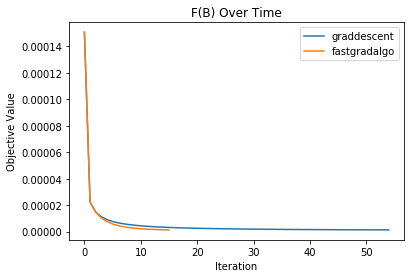

In [8]:
def objective_plots(gd_betas, fg_betas, lmbda, X=X, y=y):
    n1, _ = gd_betas.shape
    n2, _ = fg_betas.shape 
    f1s = np.zeros(n1)
    f2s = np.zeros(n2)
    
    for i in range(n1):
        f1s[i] = obj(gd_betas[i], lmbda, X=X, y=y)
    
    for i in range(n2):
        f2s[i] = obj(fg_betas[i], lmbda, X=X, y=y)
        
    plt.plot(f1s, label='graddescent')
    plt.plot(f2s, label='fastgradalgo')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Value')
    plt.title('F(B) Over Time')
    plt.legend()

    
objective_plots(gd_betas, fg_betas, 0.5)

We observe a similar hyperbolic decline in objective values for both algorithms. In early iterations ($t$ in $[0,5]$), *fastgradalgo* begins to have objective values (very slightly) lower than *graddescent*. The steepness of the two curves is similar, but *fastgradalgo* approaches a marginally lower limit for $F(\beta)$. Also, *fastgradalgo* meets its stopping criterion between $t=10$ and $t=20$, notably earlier than *graddescent's* stopping after $t=50$. So, we can summarize the lower objective threshold reached (and earlier termination) by arguing that *fastgradalgo* is more efficient than *graddescent*, while producing similarly-desirable loss.  

__Comparing Via Scikit-Learn__

Note that in the scikit-learn package, the objective function is: 

\begin{equation}
\min_{w, c} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)
\end{equation}

Minimizing this function is equivalent to minimizing:

\begin{equation}
\min_{w, c} \frac{1}{2\:n\:C}w^T w + \frac{C}{n\:C} \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)
\end{equation}

We introduced the $\frac{1}{n\:C}$ factor to arrive at our objective function. This now becomes:

\begin{equation}
\min_{w, c} \frac{1}{2\:n\:C}w^T w + \frac{1}{n} \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)
\end{equation}

Which resembles our function. This means that $\frac{1}{2\:n\:C}=\lambda$, or that $C=\frac{1}{2\:n\:\lambda}$.

__*Please note:*__ From the *sklearn* documentation, it could not be determined what the little $c$ in the exponential term within the summation is referring to. It is separate from the big $C$ mentioned here, and assumed to have negligible effect when equating the minimization of the *sklearn* objective function, and ours. 

In [9]:
# final iterates and obj values for fastgradalgo 
B_T = fg_betas[-1]
obj_Bt = "{:.2E}".format(obj(B_T, lmbda))

# sklearn model
C = [1/(2*len(y)*lmbda)]

classifier = LogisticRegressionCV(Cs=C, fit_intercept=False)
classifier.fit(X,y)

B_S = classifier.coef_.reshape((57,))
obj_Bs = "{:.2E}".format(obj(B_S, lmbda))

print("Our final iterate, B_T:\n")
print(B_T)
print("\nEstimate from sklearn:\n")
print(B_S)

Our final iterate, B_T:

[ 8.04949087e-05 -1.92765312e-05  1.25638488e-04  3.65913439e-05
  1.54296314e-04  1.48354502e-04  2.11823744e-04  1.31901983e-04
  1.47682985e-04  8.86297249e-05  1.49582244e-04  4.93702493e-06
  8.47803683e-05  3.82852881e-05  1.24946149e-04  1.67877746e-04
  1.67870911e-04  1.30243494e-04  1.74534178e-04  1.21029236e-04
  2.44425672e-04  5.85881639e-05  2.13526424e-04  1.37835101e-04
 -1.63737302e-04 -1.48586269e-04 -1.16974664e-04 -1.01282444e-04
 -8.51607904e-05 -1.09123745e-04 -8.09442902e-05 -7.28454545e-05
 -7.64917315e-05 -7.19143671e-05 -9.51755079e-05 -8.68260912e-05
 -1.13556996e-04 -1.97942381e-05 -7.83411163e-05 -4.13300618e-05
 -6.21054500e-05 -8.71329783e-05 -8.65263748e-05 -6.03318683e-05
 -8.95522045e-05 -9.32066081e-05 -2.84958876e-05 -5.35876415e-05
 -3.80316681e-05 -5.71925891e-05 -4.12714700e-05  1.54275859e-04
  2.06409729e-04  4.14994139e-05  7.01572074e-05  1.37825988e-04
  1.58916321e-04]

Estimate from sklearn:

[ 0.02257694 -0.011614

In [10]:
print("Objective value for our final iterate, B_T:\n")
print(obj_Bt)
print("\nObjective value for sklearn estimate:\n")
print(obj_Bs)

Objective value for our final iterate, B_T:

1.31E-06

Objective value for sklearn estimate:

6.89E-02


We observe that the two estimates themselves are dissimilar, and hence the objective values for the two estimates are dissimilar. In fact, the objective value for our final iterate $\beta_T$ is notably smaller than that for *sklearn's* iterate $\beta_\star$. It is unclear why this may be; theorized reasons include dissimilar data-standardizing techniques, and computation error in *our* derivations or algorithms. 

__Cross-Validation & Misclassification Error__

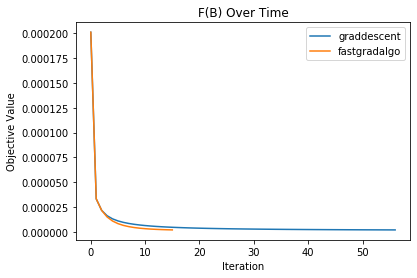

In [11]:
# use sklearn's calculation of optimal C, and correspondence to lambda
optimal_lmbda = 1 / (2*len(y)*classifier.C_[0]) 

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

new_gd_betas = graddescent(B, n0, epsilon, lmbda=optimal_lmbda, X=X_train, y=y_train)
new_fg_betas = fastgradalgo(n0, epsilon, lmbda=optimal_lmbda, X=X_train, y=y_train)

objective_plots(new_gd_betas, new_fg_betas, optimal_lmbda, X=X_train, y=y_train)

In [12]:
def error_plots(train_flag=True):
    x = X_train if train_flag else X_test
    y = y_train if train_flag else y_test
    
    subtitle = "Training Data" if train_flag else "Testing Data"
    title = "Misclassification Error vs. Iterations, %s" % subtitle
    
    gd_errs = []
    fg_errs = []
    
    # missing function to transform B,X into a 0/1 y 
    for item in new_gd_betas:
        pass 
    
    for item in new_fg_betas:
        pass 
    
    return gd_errs, fg_errs

In [13]:
# error_plots(train_flag=True)

In [14]:
# error_plots(train_flag=False)

Firstly we observe that the plot of objective values matches our earlier plots of the same. A quick check confirms that this is indeed because the optimal $\lambda$ from *sklearn* turned out to be: 

In [15]:
optimal_lmbda

0.5

So, *sklearn* arrived at the same $\lambda$ that had been used throughout the exercise, hence the plots of objective values were identical. 

Finally, note that at this point, a working misclassification-error curve for *our* algorithms was unable to be devised. 

# Exercise 2

(a) As we increase $\lambda$, the misclassification error on the training set will (iii), steadily increase. This is because the term penalizes the complexity, or variance, of a model. Here, it penalizes coefficients that fit to the noise in the training data (which leads to overfitting). Since we exclusively see the training set, it will seem that the error is only rising, because larger terms will increasingly restrict the coefficients, and hinder the model's learning of the training data. 

(b) For a large, previously unseen dataset (from the same distribution as the training data), the error will (ii), decrease initially and then increase in a U-shaped pattern. This is because the new set helps validate the model. If $\lambda$ is increasing, then even though the training set may see worse performance, a larger regularization term lowers model variance. So, for this new data, we should see an inital lowering of the error, since $\lambda$ is helping us generalize the model. However, after a certain point, increasing $\lambda$ has too harsh and simplistic an effect on the coefficients. This reductive effect will increase the bias of the model, which will later result in a sharp uptick in the error.

__*Please note:*__ while the document says 'parts (a) through (e)', the provided questions only contain parts (a) and (b). 